In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from mods import prep, plotter, models, class_test
%matplotlib inline
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
WT_08_lbl, WT_08_rtot, WT_08_lig, WT_08_sat = prep.datprep('data/EGFR_WT_08_Sat.csv','data/EGFR_WT_08_Rtot.csv')
WT_09_lbl, WT_09_rtot, WT_09_lig, WT_09_sat = prep.datprep('data/EGFR_WT_09_Sat.csv','data/EGFR_WT_09_Rtot.csv')
WT_11_lbl, WT_11_rtot, WT_11_lig, WT_11_sat = prep.datprep('data/EGFR_WT_11_Sat.csv','data/EGFR_WT_11_Rtot.csv')

hootie hoo! the indices match!
hootie hoo! the indices match!
hootie hoo! the indices match!


In [4]:
guess = np.array([10.,10.,10.,1000.])

In [5]:
bnd = ((0.,0.,0.,0.),(100.,100.,100.,10000.))

In [7]:
fit_09 = optimize.least_squares(models.wyman_sp,guess,bounds=bnd,args=(WT_09_lig,WT_09_sat,WT_09_rtot))

In [8]:
fit_09.x

array([  4.49637583e+00,   1.92957029e+00,   2.02801264e-01,
         1.08207498e+03])

In [9]:
fit_09_w = optimize.least_squares(models.wyman_sp,guess,bounds=bnd,args=(WT_09_lig,WT_09_sat,WT_09_rtot,WT_09_sat))

In [10]:
fit_09_w.x

array([  3.96088173e+00,   1.26911829e+00,   4.70069931e-01,
         8.30673380e+02])

In [11]:
fit_08 = optimize.least_squares(models.wyman_sp,guess,bounds=bnd,args=(WT_08_lig,WT_08_sat,WT_08_rtot))

In [12]:
fit_08.x

array([   3.7953011 ,    5.44192435,    0.19625125,  170.10336433])

In [13]:
fit_08_w = optimize.least_squares(models.wyman_sp,guess,bounds=bnd,args=(WT_08_lig,WT_08_sat,WT_08_rtot,WT_08_sat))

In [14]:
fit_08_w.x

array([  6.24964725e+00,   6.00344047e+00,   4.96984733e-01,
         3.48834478e+03])

In [15]:
fit_11 = optimize.least_squares(models.wyman_sp,guess,bounds=bnd,args=(WT_11_lig,WT_11_sat,WT_11_rtot))

In [16]:
fit_11.x

array([  3.35243589e+00,   9.08245070e-01,   1.69321917e-01,
         2.25993331e+02])

In [17]:
fit_11_w = optimize.least_squares(models.wyman_sp,guess,bounds=bnd,args=(WT_11_lig,WT_11_sat,WT_11_rtot,WT_11_sat))

In [18]:
fit_11_w.x

array([  3.63854935e+00,   6.34828213e-01,   7.11039664e-02,
         2.23405330e+02])

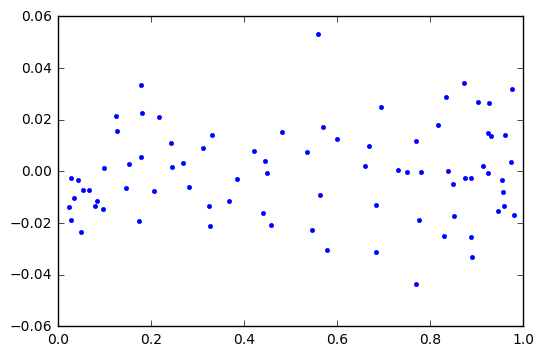

In [23]:
plotter.resplot(models.wyman_bestfit,fit_08,WT_08_lig,WT_08_rtot)

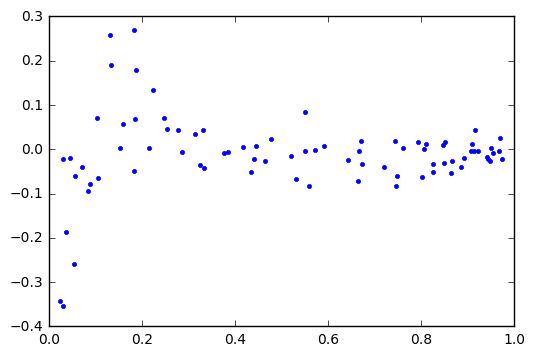

In [21]:
plotter.resplot(models.wyman_bestfit,fit_08_w,WT_08_lig,WT_08_rtot)

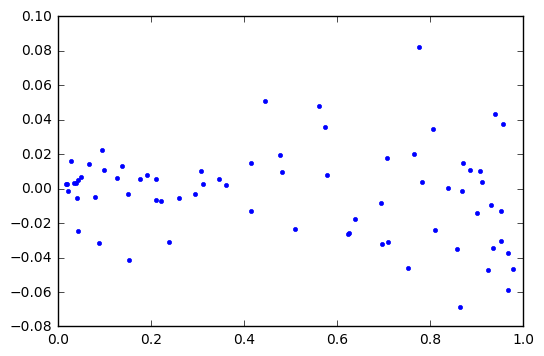

In [24]:
plotter.resplot(models.wyman_bestfit,fit_09,WT_09_lig,WT_09_rtot)

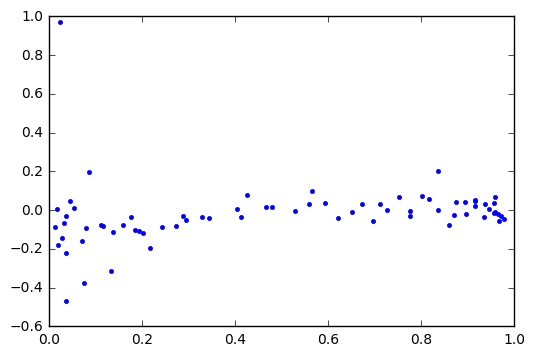

In [25]:
plotter.resplot(models.wyman_bestfit,fit_09_w,WT_09_lig,WT_09_rtot)

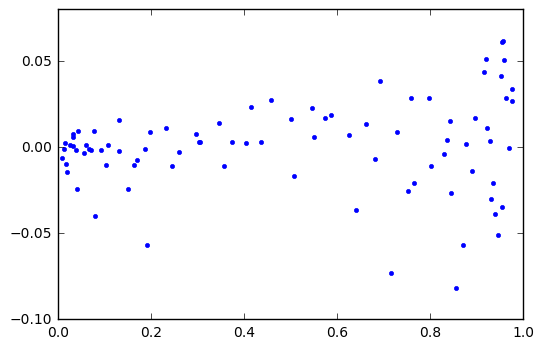

In [26]:
plotter.resplot(models.wyman_bestfit,fit_11,WT_11_lig,WT_11_rtot)

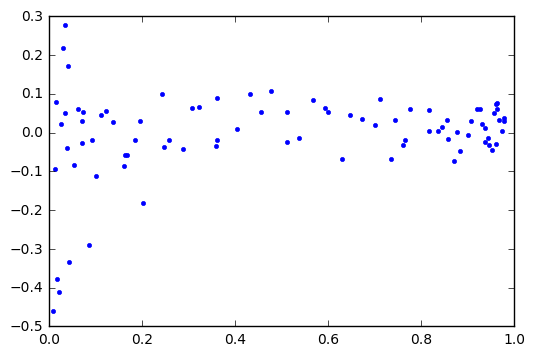

In [28]:
plotter.resplot(models.wyman_bestfit,fit_11_w,WT_11_lig,WT_11_rtot)

In [29]:
from mods import class_test

In [30]:
sim = class_test.WymanSim(sets=1)

In [31]:
sim.bfrac

array([[ 0.00270114,  0.00538823,  0.01072068,  0.02122155,  0.04158962,
         0.07995809,  0.14838883,  0.25922436,  0.41318706,  0.58652335,
         0.74071453,  0.85171564,  0.92017061,  0.95850362,  0.97883397,
         0.98930956,  0.99462754,  0.99730691],
       [ 0.00245828,  0.00490498,  0.00976393,  0.01934623,  0.03798528,
         0.07328746,  0.1368788 ,  0.24163521,  0.39089596,  0.5643122 ,
         0.72336186,  0.84051004,  0.91375548,  0.95506705,  0.97705513,
         0.98840459,  0.99417112,  0.99707771],
       [ 0.0022312 ,  0.00445269,  0.0088668 ,  0.01758129,  0.03456848,
         0.06687522,  0.12552496,  0.22348911,  0.36624904,  0.53744654,
         0.70032845,  0.82445614,  0.90407663,  0.94972034,  0.97424055,
         0.98695999,  0.99343923,  0.99670934],
       [ 0.00199594,  0.0039838 ,  0.00793546,  0.01574391,  0.03099184,
         0.06009095,  0.11326691,  0.20317096,  0.33694389,  0.50263769,
         0.66730939,  0.79914398,  0.88766661,  0.940

In [32]:
fit = class_test.WymanSimFit(sim)

In [33]:
fit.ests

array([[   3.15297694,    2.14105044,    0.18820001,  140.55866532]])

In [34]:
fity = class_test.WymanSimFit(sim,weight=3)

In [35]:
fity.ests

array([[  2.96689406e+00,   1.87069449e+00,   3.36082904e-02,
          8.43665543e+01]])

In [36]:
plotter.resplot(models.wyman_bestfit,fit_11,WT_11_lig,WT_11_rtot)

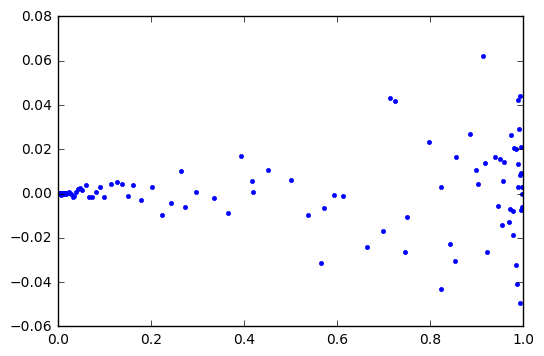

In [56]:
plt.plot(np.concatenate(class_test.WymanSim(parms=fit.ests[0]).bfrac),fit.fits[0].fun,'.')

In [41]:
fit.fits[0].fun

array([  7.57564548e-05,   2.45807755e-04,   3.95113964e-04,
         3.40746431e-04,   2.06938708e-03,   7.63904055e-04,
        -1.23035666e-03,   1.03147788e-02,   6.17832738e-04,
        -5.60877536e-04,  -2.61713910e-02,   1.65287468e-02,
        -2.65972201e-02,   1.43654148e-02,   2.04666962e-02,
         2.82938171e-03,   9.35204130e-03,  -1.33618391e-04,
        -1.52061077e-04,   5.88123155e-05,  -2.65652117e-04,
         4.78727576e-04,   6.46758931e-04,  -1.63045160e-03,
         4.24212843e-03,  -4.39337639e-03,   1.68700117e-02,
        -3.15296311e-02,   4.20087892e-02,  -2.28821429e-02,
         6.21008283e-02,  -1.44004352e-02,  -7.89427860e-03,
         4.24387510e-02,   8.23564992e-03,  -6.03245673e-03,
        -7.37470268e-05,  -1.61606696e-04,   7.67257283e-07,
        -2.48199016e-04,  -1.25727429e-03,  -1.56768673e-03,
         5.24859195e-03,  -9.82244775e-03,  -8.61687975e-03,
        -9.56543757e-03,  -1.70847733e-02,   3.05474058e-03,
         4.28825046e-03,

In [54]:
np.concatenate(class_test.WymanSim(parms=fit.ests[0]).bfrac)

array([ 0.00275794,  0.00550133,  0.01094488,  0.02166211,  0.04244058,
        0.08154816,  0.15118197,  0.26362871,  0.4190513 ,  0.5927644 ,
        0.74594834,  0.85530642,  0.92231543,  0.95968259,  0.97945304,
        0.98962689,  0.99478821,  0.99738776,  0.0024754 ,  0.00493905,
        0.00983146,  0.01947891,  0.03824146,  0.07376588,  0.13771902,
        0.24296297,  0.39268055,  0.56625488,  0.72504838,  0.84170939,
        0.91449193,  0.95547902,  0.9772736 ,  0.98851717,  0.99422828,
        0.99710651,  0.00223116,  0.00445255,  0.00886632,  0.01757946,
        0.03456162,  0.06685033,  0.12544103,  0.22324238,  0.36566874,
        0.53644496,  0.6991113 ,  0.82338109,  0.9033275 ,  0.94927132,
        0.97399364,  0.98683038,  0.9933728 ,  0.99667571,  0.00199213,
        0.00397613,  0.00791993,  0.01571211,  0.0309255 ,  0.05994883,
        0.11295526,  0.20249462,  0.3356026 ,  0.50045119,  0.66460152,
        0.79662423,  0.88581642,  0.93906757,  0.96845325,  0.98

In [49]:
fit.ests[0]

array([   3.15297694,    2.14105044,    0.18820001,  140.55866532])

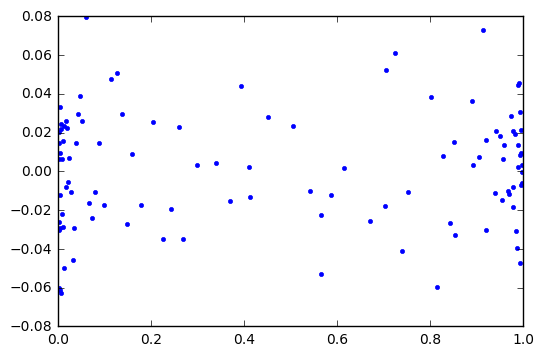

In [59]:
plt.plot(np.concatenate(class_test.WymanSim(parms=fity.ests[0]).bfrac),fity.fits[0].fun,'.')